In [47]:
import numpy as np
import  torch
from numpy import genfromtxt
import torch.nn  as nn
import torch.nn.functional  as F
from plot_keras_history import show_history, plot_history
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt


In [ ]:
csvdata = genfromtxt('Cropdata.csv',delimiter = ',',dtype = 'float32')        
csvdata

In [ ]:
testinput = csvdata[len(csvdata)-1:len(csvdata),1:4]
print(testinput)


inputs = csvdata[1:len(csvdata)-1,1:4]
inputs , inputs.dtype 


In [ ]:
targets = csvdata[1:len(csvdata)-1,4:6]
targets , targets.dtype


In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
inputs.shape

In [ ]:
dataset = TensorDataset(inputs,targets)


In [ ]:
dataset[0:3]


In [ ]:
batch_size = 5
dataloader = DataLoader(dataset,batch_size,shuffle=True)
dataloader

In [ ]:
for inputsDataSet,targetsDataSet in dataloader: 
    print(inputsDataSet)
    print(targetsDataSet)
    print(inputsDataSet.shape)
    print(targetsDataSet.shape)
    break;
    

Creating the Linear model , it will take 3 input parameters and output 2 parameters

In [ ]:
model = nn.Linear(3,2)
print(model)
print(model.weight)
print(model.bias)


In [ ]:
list(model.parameters())

In [ ]:
prediction = model(inputs)
prediction

In [ ]:
loss = F.mse_loss(prediction,targets)
print(loss)
loss.backward()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.00001)

In [ ]:
optimizer.step()

In [ ]:
optimizer.zero_grad()

<H1> Model</H1>


In [ ]:
def trainer(num_epoch , model , loss_func ,  loader , lr) :
    training_output = []
    opt = torch.optim.SGD(model.parameters() , lr = lr)
    for epoch in range(num_epoch) :
        for inputs , targets in loader :
            prediction = model(inputs)
            loss = loss_func(prediction , targets)
            loss.backward()
            opt.step()
            opt.zero_grad()
            
           
        training_output.append((epoch,loss.item()))
        if((epoch + 1)%10 == 0):
            print(f'Running loss {loss.item()}')

    return training_output
        


    

In [ ]:
training_output = trainer(200,model,F.mse_loss,dataloader,0.00001)

In [ ]:
print(training_output)

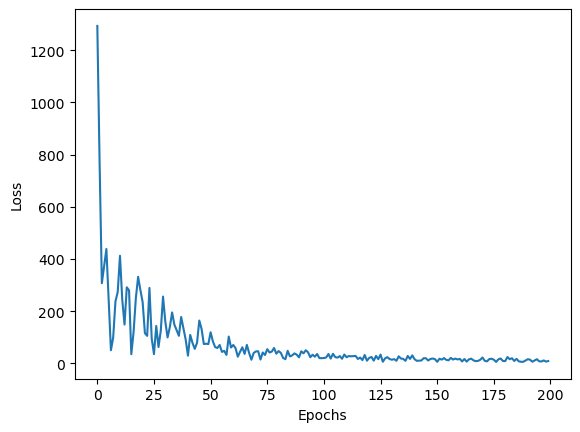

In [50]:
epochs = list(zip(*training_output))[0]
loss = list(zip(*training_output))[1]
plt.figure()
x = epochs
y = loss
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(x,y)




In [ ]:
model(torch.from_numpy(testinput))